### Natural Language Processing Review and Extension

**OBJECTIVES**

- Review vectorization options from sklearn
- Review word embeddings in keras models
- Use transformers to build embeddings in a model
- Use sequential neural nets on text

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [110]:
df = pd.read_csv('data/all-data.csv', encoding='latin', names = ['sentiment', 'text'])

In [111]:
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [112]:
df.iloc[0, 1]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [113]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('data/Sarcasm_Headlines_Dataset.json'))

In [114]:
data[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [115]:
headlines = [hline['headline'] for hline in data]
sarcastic = [hline['is_sarcastic'] for hline in data]

In [116]:
sarc_df = pd.DataFrame({'headline': headlines, 'sarcastic': sarcastic})

In [117]:
sarc_df.head()

,headline,sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [118]:
sarc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
headline     26709 non-null object
sarcastic    26709 non-null int64
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [119]:
sarc_df.iloc[2, 0]

"mom starting to fear son's web series closest thing she will have to grandchild"

In [120]:
sarc_df.iloc[3, 0]

'boehner just wants wife to listen, not come up with alternative debt-reduction ideas'

In [121]:
sarc_df['sarcastic'].value_counts(normalize = True)

0    0.561047
1    0.438953
Name: sarcastic, dtype: float64

### Machine Learning Models

In [122]:
#logistic regressor, naive bayes, decision tree, random forest
from sklearn.pipeline import Pipeline

In [123]:
pipe = Pipeline([('preprocessor', CountVectorizer()), ('classifier', LogisticRegression())])

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
params = [
    {'classifier': [MultinomialNB()], 'preprocessor': [CountVectorizer(ngram_range = (3, 5))],
    'classifier__alpha': [0.1, 1.0, 10.0], 
     'preprocessor__max_features': [100, 500, 1000, 5000]},
    {'classifier': [DecisionTreeClassifier()], 'preprocessor': [CountVectorizer(ngram_range = (3, 5))],
    'classifier__max_depth': [3, 4, 5], 'classifier__ccp_alpha': [0.1, 1.0, 10.0]},
    {'classifier': [RandomForestClassifier(n_estimators=100)], 'preprocessor': [TfidfVectorizer(ngram_range = (3, 5))],
    'classifier__max_depth': [2, 3, 4, 5], 'preprocessor__max_features': [100, 500, 1000, 5000]}
]

In [126]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [127]:
grid_acc = GridSearchCV(pipe, param_grid=params, n_jobs = -1)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(sarc_df['headline'], sarc_df['sarcastic'])

In [129]:
grid_acc.fit(X_train, y_train)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=Pipeline(steps=[('preprocessor', CountVectorizer()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [MultinomialNB(alpha=0.1)],
                          'classifier__alpha': [0.1, 1.0, 10.0],
                          'preprocessor': [CountVectorizer(max_features=5000,
                                                           ngram_range=(3, 5))],
                          'preprocessor__max_features': [100, 500, 1000, 5000]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__ccp_alpha': [0.1, 1.0, 10.0],
                          'classifier__max_depth': [3, 4, 5],
                          'preprocessor': [CountVectorizer(ngram_range=(3,
                                                                        5))]},
                         {'classifier': [RandomForestClassifier()],
                          '

In [130]:
grid_acc.best_estimator_

Pipeline(steps=[('preprocessor',
                 CountVectorizer(max_features=5000, ngram_range=(3, 5))),
                ('classifier', MultinomialNB(alpha=0.1))])

In [131]:
grid_acc.score(X_test, y_test)

0.5940401317759808

In [132]:
grid_acc.score(X_train, y_train)

0.6662672857071539

In [133]:
from sklearn.metrics import plot_confusion_matrix

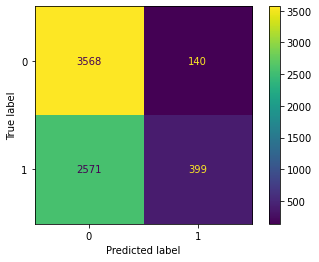

In [134]:
plot_confusion_matrix(grid_acc, X_test, y_test)

### Neural Network Models

In [135]:
from keras.wrappers.scikit_learn import KerasClassifier

In [136]:
def model():
    network = Sequential()
    network.add(Dropout(0.4))
    network.add(Dense(64))
    network.add(Dense(1, activation = 'sigmoid'))
    network.compile(optimizer='adam', loss = 'binary_crossentopy', metrics = ['acc'])
    return network

In [137]:
kclass = KerasClassifier(build_fn = model, nb_epoch = 10)

In [138]:
Xv_train = cvect.fit_transform(X_train)
Xv_test = cvect.transform(X_test)

In [146]:
nwork = Sequential()
nwork.add(Dropout(0.4))
nwork.add(Dense(64, input_shape = (Xv_train.shape[1],)))
nwork.add(Dense(1, activation = 'sigmoid'))
nwork.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [150]:
history = nwork.fit(Xv_train.toarray(), y_train.values, validation_data = (Xv_test.toarray(), y_test.values), epochs = 20)

Train on 20031 samples, validate on 6678 samples
Epoch 1/20
20031/20031 [==============================] - 2s 100us/step - loss: 0.5743 - acc: 0.6929 - val_loss: 0.4927 - val_acc: 0.7634
Epoch 2/20
20031/20031 [==============================] - 2s 89us/step - loss: 0.4904 - acc: 0.7560 - val_loss: 0.4745 - val_acc: 0.7760
Epoch 3/20
20031/20031 [==============================] - 2s 96us/step - loss: 0.4619 - acc: 0.7706 - val_loss: 0.4735 - val_acc: 0.7770
Epoch 4/20
20031/20031 [==============================] - 2s 88us/step - loss: 0.4560 - acc: 0.7765 - val_loss: 0.4677 - val_acc: 0.7764
Epoch 5/20
20031/20031 [==============================] - 2s 90us/step - loss: 0.4498 - acc: 0.7807 - val_loss: 0.4644 - val_acc: 0.7785
Epoch 6/20
20031/20031 [==============================] - 2s 93us/step - loss: 0.4418 - acc: 0.7802 - val_loss: 0.4677 - val_acc: 0.7803
Epoch 7/20
20031/20031 [==============================] - 2s 95us/step - loss: 0.4404 - acc: 0.7825 - val_loss: 0.4627 - val_acc

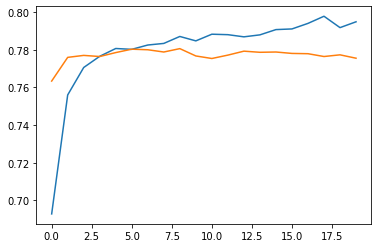

In [151]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [159]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [170]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(sarc_df['headline'])

In [171]:
sequences = tokenizer.texts_to_sequences(sarc_df['headline'])

In [172]:
training_samples = 2500
validation_samples = 2500
maxlen = 500

In [173]:
data = pad_sequences(sequences, maxlen = maxlen)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = sarc_df['sarcastic'].values[indices]

In [174]:
x_train = data[:training_samples]
x_test = data[training_samples:training_samples + 500]
y_train = labels[:training_samples]
y_test = labels[training_samples:training_samples + 500]

In [175]:
from keras.layers import Embedding, Flatten

In [176]:
model = Sequential()
model.add(Embedding(5000, 100, input_length = maxlen))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [177]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2500 samples, validate on 500 samples
Epoch 1/10
2500/2500 [==============================] - 2s 980us/step - loss: 0.9055 - acc: 0.5668 - val_loss: 0.5632 - val_acc: 0.7900
Epoch 2/10
2500/2500 [==============================] - 2s 936us/step - loss: 0.3521 - acc: 0.8780 - val_loss: 0.4313 - val_acc: 0.8000
Epoch 3/10
2500/2500 [==============================] - 2s 947us/step - loss: 0.1077 - acc: 0.9756 - val_loss: 0.4465 - val_acc: 0.8080
Epoch 4/10
2500/2500 [==============================] - 2s 957us/step - loss: 0.0295 - acc: 0.9960 - val_loss: 0.4792 - val_acc: 0.8020
Epoch 5/10
2500/2500 [==============================] - 2s 940us/step - loss: 0.0123 - acc: 0.9992 - val_loss: 0.5094 - val_acc: 0.8000
Epoch 6/10
2500/2500 [==============================] - 2s 940us/step - loss: 0.0067 - acc: 0.9992 - val_loss: 0.5349 - val_acc: 0.7980
Epoch 7/10
2500/2500 [==============================] - 2s 944us/step - loss: 0.0044 - acc: 0.9996 - val_loss: 0.5595 - val_acc: 0.7980
E

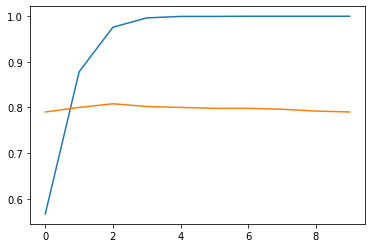

In [178]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [69]:
from sklearn.pipeline import make_pipeline

In [86]:
kpipe = make_pipeline(cvect, kclass)

In [87]:
kpipe.fit(X_train, y_train)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=  (0, 3281)	1
  (0, 4052)	1
  (1, 358)	1
  (1, 3940)	1
  (1, 2913)	1
  (1, 1038)	1
  (1, 4699)	1
  (1, 516)	1
  (1, 2758)	1
  (1, 1194)	1
  (2, 4009)	1
  (2, 1809)	1
  (2, 4852)	1
  (2, 2708)	1
  (3, 3223)	1
  (3, 490)	1
  (3, 4280)	1
  (3, 4714)	1
  (3, 327)	1
  (3, 2822)	1
  (3, 1501)	1
  (4, 3829)	1
  (4, 2276)	1
  (4, 2293)	1
  (4, 755)	1
  :	:
  (20027, 1540)	1
  (20027, 134)	1
  (20027, 4898)	1
  (20027, 3589)	1
  (20028, 947)	1
  (20028, 3576)	1
  (20028, 4945)	1
  (20028, 1417)	1
  (20028, 2639)	1
  (20028, 406)	1
  (20028, 1035)	1
  (20028, 3512)	1
  (20029, 2536)	1
  (20029, 4204)	1
  (20029, 2504)	1
  (20029, 564)	1
  (20029, 2527)	1
  (20029, 352)	1
  (20029, 1116)	1
  (20029, 2439)	1
  (20029, 687)	1
  (20029, 4549)	1
  (20030, 2752)	1
  (20030, 1729)	1
  (20030, 251)	1